In [36]:
import pandas as pd
import numpy as np

# Step 1: Load your dataset
df = pd.read_csv("Mental Health Dataset.csv")   # change filename if needed
df = df.drop(columns=["Timestamp"])

# Step 2: Define entropy function
def calculate_entropy(series):
    # Drop missing values
    series = series.dropna()
    
    # If numeric → equal width binning (4 bins)
    if pd.api.types.is_numeric_dtype(series):
        series = pd.cut(series, bins=4, labels=False)
    
    # Get value counts (probabilities)
    probs = series.value_counts(normalize=True)
    
    # Apply entropy formula: -sum(p * log2(p))
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

# Step 3: Apply entropy to all columns
entropy_values = {}
for col in df.columns:
    entropy_values[col] = calculate_entropy(df[col])

# Step 4: Convert to DataFrame for better view
entropy_df = pd.DataFrame(list(entropy_values.items()), columns=["Column", "Entropy"])

print(entropy_df)


                     Column   Entropy
0                    Gender  0.679242
1                   Country  2.343150
2                Occupation  2.314190
3             self_employed  0.473963
4            family_history  0.968052
5                 treatment  0.999932
6              Days_Indoors  2.319448
7            Growing_Stress  1.584105
8            Changes_Habits  1.578778
9     Mental_Health_History  1.583268
10              Mood_Swings  1.583567
11         Coping_Struggles  0.997759
12            Work_Interest  1.579000
13          Social_Weakness  1.583204
14  mental_health_interview  0.855614
15             care_options  1.563475


In [34]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Mental Health Dataset.csv")
df = df.drop(columns=["Timestamp"])

def gini_index(column):
    probs = column.value_counts(normalize=True)
    return 1 - sum(probs**2)

# Calculate Gini for each column
gini_scores = {}
for col in df.columns:
    gini_scores[col] = gini_index(df[col].dropna())

# Convert to DataFrame for nice viewing
gini_df = pd.DataFrame(list(gini_scores.items()), columns=["Feature", "Gini_Index"])
print(gini_df)


                    Feature  Gini_Index
0                    Gender    0.294711
1                   Country    0.619653
2                Occupation    0.797874
3             self_employed    0.182512
4            family_history    0.478019
5                 treatment    0.499953
6              Days_Indoors    0.799311
7            Growing_Stress    0.666274
8            Changes_Habits    0.663783
9     Mental_Health_History    0.665877
10              Mood_Swings    0.666028
11         Coping_Struggles    0.498447
12            Work_Interest    0.663963
13          Social_Weakness    0.665854
14  mental_health_interview    0.337418
15             care_options    0.656723


In [28]:
import pandas as pd

df = pd.read_csv("Mental Health Dataset.csv")
print(df.columns)


Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [32]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("Mental Health Dataset.csv")
df = df.drop(columns=["Timestamp"])

# -----------------------------
# 2. Define Entropy Function
# -----------------------------
def entropy(column):
    """Calculate entropy of a pandas Series (target column)."""
    counts = column.value_counts(normalize=True)  # probabilities
    return -np.sum(counts * np.log2(counts + 1e-9))  # avoid log(0)

# -----------------------------
# 3. Information Gain Function
# -----------------------------
def information_gain(df, feature, target):
    """Compute Information Gain of a feature with respect to target."""
    total_entropy = entropy(df[target])  # before split

    # Weighted entropy after split
    values = df[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weighted_entropy += (len(subset)/len(df)) * entropy(subset[target])

    return total_entropy - weighted_entropy

# -----------------------------
# 4. Helper for Numeric Columns (binning)
# -----------------------------
def bin_numeric_column(df, column, bins=4):
    """Convert numeric column into categorical bins."""
    df[column] = pd.cut(df[column], bins=bins, labels=False)
    return df

# -----------------------------
# 5. Find Best Root Node
# -----------------------------
def find_root_node_with_binning(df, target, bins=4):
    ig_scores = {}
    for feature in df.columns:
        if feature == target:
            continue
        if pd.api.types.is_numeric_dtype(df[feature]):
            temp_df = df.copy()
            temp_df = bin_numeric_column(temp_df, feature, bins)
            ig_scores[feature] = information_gain(temp_df, feature, target)
        else:
            ig_scores[feature] = information_gain(df, feature, target)

    root = max(ig_scores, key=ig_scores.get)  # best feature
    return root, ig_scores

# -----------------------------
# 6. Run Example
# -----------------------------
root_node, scores = find_root_node_with_binning(df, target="treatment", bins=4)

print("Best Root Node (Decision Tree starts with):", root_node)
print("\nInformation Gain Scores for all features:")
for feature, score in scores.items():
    print(f"{feature}: {score:.4f}")


Best Root Node (Decision Tree starts with): family_history

Information Gain Scores for all features:
Gender: 0.0232
Country: 0.0633
Occupation: 0.0001
self_employed: 0.0187
family_history: 0.0999
Days_Indoors: 0.0000
Growing_Stress: 0.0001
Changes_Habits: 0.0000
Mental_Health_History: 0.0000
Mood_Swings: 0.0000
Coping_Struggles: 0.0001
Work_Interest: 0.0000
Social_Weakness: 0.0000
mental_health_interview: 0.0070
care_options: 0.0638


In [57]:
print(df.head())        # show first 5 rows
print(df.columns)       # list all column names
print(df["Days_Indoors"].dtype)   # check data type
print(df["Days_Indoors"].unique()[:10])  # sample unique values


   Gender        Country Occupation self_employed family_history treatment  \
0  Female  United States  Corporate           NaN             No       Yes   
1  Female  United States  Corporate           NaN            Yes       Yes   
2  Female  United States  Corporate           NaN            Yes       Yes   
3  Female  United States  Corporate            No            Yes       Yes   
4  Female  United States  Corporate            No            Yes       Yes   

  Days_Indoors Growing_Stress Changes_Habits Mental_Health_History  \
0    1-14 days            Yes             No                   Yes   
1    1-14 days            Yes             No                   Yes   
2    1-14 days            Yes             No                   Yes   
3    1-14 days            Yes             No                   Yes   
4    1-14 days            Yes             No                   Yes   

  Mood_Swings Coping_Struggles Work_Interest Social_Weakness  \
0      Medium               No            No  

In [59]:
import numpy as np

# Make a copy of column
df["Days_Indoors_Clean"] = df["Days_Indoors"].replace({
    "Go out Every day": 0,
    "1-14 days": 7,
    "15-30 days": 22,
    "31-60 days": 45,
    "More than 2 months": 75   # approx
})

# Convert to numeric (just in case)
df["Days_Indoors_Clean"] = pd.to_numeric(df["Days_Indoors_Clean"], errors="coerce")

print(df[["Days_Indoors", "Days_Indoors_Clean"]].head(10))


  Days_Indoors  Days_Indoors_Clean
0    1-14 days                   7
1    1-14 days                   7
2    1-14 days                   7
3    1-14 days                   7
4    1-14 days                   7
5    1-14 days                   7
6    1-14 days                   7
7    1-14 days                   7
8    1-14 days                   7
9    1-14 days                   7


C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_16276\91109865.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Days_Indoors_Clean"] = df["Days_Indoors"].replace({


In [61]:
# Equal width binning (4 bins)
df["Days_Indoors_EQW"] = pd.cut(df["Days_Indoors_Clean"], bins=4, labels=False)

# Equal frequency binning (4 bins)
df["Days_Indoors_FREQ"] = pd.qcut(df["Days_Indoors_Clean"], q=4, labels=False)

print(df[["Days_Indoors", "Days_Indoors_Clean", "Days_Indoors_EQW", "Days_Indoors_FREQ"]].head(15))


   Days_Indoors  Days_Indoors_Clean  Days_Indoors_EQW  Days_Indoors_FREQ
0     1-14 days                   7                 0                  0
1     1-14 days                   7                 0                  0
2     1-14 days                   7                 0                  0
3     1-14 days                   7                 0                  0
4     1-14 days                   7                 0                  0
5     1-14 days                   7                 0                  0
6     1-14 days                   7                 0                  0
7     1-14 days                   7                 0                  0
8     1-14 days                   7                 0                  0
9     1-14 days                   7                 0                  0
10    1-14 days                   7                 0                  0
11    1-14 days                   7                 0                  0
12    1-14 days                   7                

In [63]:
print(df["Days_Indoors"].unique())
print(df[["Days_Indoors", "Days_Indoors_Clean"]].drop_duplicates())


['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
            Days_Indoors  Days_Indoors_Clean
0              1-14 days                   7
121     Go out Every day                   0
242   More than 2 months                  75
726           15-30 days                  22
1452          31-60 days                  45


In [65]:
import pandas as pd

# Mapping Days_Indoors to numeric values
df["Days_Indoors_Clean"] = df["Days_Indoors"].replace({
    "Go out Every day": 0,
    "1-14 days": 7,
    "15-30 days": 22,
    "31-60 days": 45,
    "More than 2 months": 75
})

df["Days_Indoors_Clean"] = pd.to_numeric(df["Days_Indoors_Clean"], errors="coerce")

# Equal width binning (4 bins)
df["Days_Indoors_EQW"] = pd.cut(df["Days_Indoors_Clean"], bins=4, labels=["Low", "Medium", "High", "Very High"])

# Equal frequency binning (4 bins)
df["Days_Indoors_FREQ"] = pd.qcut(df["Days_Indoors_Clean"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Display sample
print(df[["Days_Indoors", "Days_Indoors_Clean", "Days_Indoors_EQW", "Days_Indoors_FREQ"]].head(20))


   Days_Indoors  Days_Indoors_Clean Days_Indoors_EQW Days_Indoors_FREQ
0     1-14 days                   7              Low                Q1
1     1-14 days                   7              Low                Q1
2     1-14 days                   7              Low                Q1
3     1-14 days                   7              Low                Q1
4     1-14 days                   7              Low                Q1
5     1-14 days                   7              Low                Q1
6     1-14 days                   7              Low                Q1
7     1-14 days                   7              Low                Q1
8     1-14 days                   7              Low                Q1
9     1-14 days                   7              Low                Q1
10    1-14 days                   7              Low                Q1
11    1-14 days                   7              Low                Q1
12    1-14 days                   7              Low                Q1
13    

C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_16276\2517789943.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Days_Indoors_Clean"] = df["Days_Indoors"].replace({


In [75]:
import numpy as np
import pandas as pd

# -------------------------
# A3: Create Synthetic Data
# -------------------------
def create_synthetic_data():
    np.random.seed(42)
    data = pd.DataFrame({
        "MEG0011": np.random.randint(1, 100, 50),  # Continuous feature
        "Target": np.random.choice(["Yes", "No"], 50)  # Class label
    })
    return data

# -------------------------
# A4: Binning Function
# -------------------------
def binning(data, num_bins=4, bin_type='equal_width'):
    """
    Performs equal-width or equal-frequency binning on a continuous data column.
    """
    if bin_type == 'equal_width':
        bins = np.linspace(min(data), max(data), num_bins + 1)
        binned_data = pd.cut(data, bins, labels=False, include_lowest=True)
    elif bin_type == 'equal_frequency':
        binned_data = pd.qcut(data, num_bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid bin_type. Choose 'equal_width' or 'equal_frequency'.")
        
    return binned_data

# -------------------------
# A5: Decision Tree Module
# -------------------------
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def best_split(X, y):
    best_gain = -1
    split_idx, split_thresh = None, None
    parent_entropy = entropy(y)

    n_features = X.shape[1]
    for feature_idx in range(n_features):
        thresholds = np.unique(X[:, feature_idx])
        for t in thresholds:
            left_mask = X[:, feature_idx] <= t
            right_mask = X[:, feature_idx] > t

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_entropy = entropy(y[left_mask])
            right_entropy = entropy(y[right_mask])
            n = len(y)
            child_entropy = (np.sum(left_mask)/n) * left_entropy + (np.sum(right_mask)/n) * right_entropy
            info_gain = parent_entropy - child_entropy

            if info_gain > best_gain:
                best_gain = info_gain
                split_idx = feature_idx
                split_thresh = t

    return split_idx, split_thresh

def build_tree(X, y, depth=0, max_depth=3):
    if len(np.unique(y)) == 1 or depth >= max_depth:
        values, counts = np.unique(y, return_counts=True)
        return Node(value=values[np.argmax(counts)])

    feature_idx, threshold = best_split(X, y)
    if feature_idx is None:
        values, counts = np.unique(y, return_counts=True)
        return Node(value=values[np.argmax(counts)])

    left_mask = X[:, feature_idx] <= threshold
    right_mask = X[:, feature_idx] > threshold

    left_child = build_tree(X[left_mask], y[left_mask], depth+1, max_depth)
    right_child = build_tree(X[right_mask], y[right_mask], depth+1, max_depth)

    return Node(feature=feature_idx, threshold=threshold, left=left_child, right=right_child)

def predict_one(node, x):
    if node.value is not None:
        return node.value
    if x[node.feature] <= node.threshold:
        return predict_one(node.left, x)
    else:
        return predict_one(node.right, x)

def predict(tree, X):
    return np.array([predict_one(tree, x) for x in X])

def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf: {node.value}")
    else:
        print(f"{indent}Feature {node.feature} <= {node.threshold}")
        print_tree(node.left, depth+1)
        print_tree(node.right, depth+1)

# -------------------------
# Main Section
# -------------------------
if __name__ == "__main__":
    # Step 1: Create dataset
    data = create_synthetic_data()

    # Step 2: Apply binning
    data["MEG0011_EQW"] = binning(data["MEG0011"], bin_type='equal_width')
    data["MEG0011_FREQ"] = binning(data["MEG0011"], bin_type='equal_frequency')

    print("\n--- A4. Binning ---")
    print(data.head())

    # Step 3: Decision Tree (use both binned features)
    X = data[["MEG0011_EQW", "MEG0011_FREQ"]].values
    y = data["Target"].values

    tree = build_tree(X, y, max_depth=3)

    print("\n--- A5. Decision Tree Structure ---")
    print_tree(tree)

    preds = predict(tree, X)
    accuracy = np.sum(preds == y) / len(y)

    print("\nPredictions (first 10):", preds[:10])
    print("Accuracy:", accuracy)



--- A4. Binning ---
   MEG0011 Target  MEG0011_EQW  MEG0011_FREQ
0       52     No            2             1
1       93    Yes            3             3
2       15     No            0             0
3       72     No            3             2
4       61     No            2             2

--- A5. Decision Tree Structure ---
Feature 1 <= 2
  Feature 0 <= 1
    Feature 0 <= 0
      Leaf: No
      Leaf: No
    Feature 0 <= 2
      Leaf: No
      Leaf: No
  Leaf: No

Predictions (first 10): ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
Accuracy: 0.72


In [87]:
print(data.columns)


Index(['MEG0011', 'Target', 'MEG0011_EQW', 'MEG0011_FREQ'], dtype='object')


In [79]:
pip install graphviz


   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ------------------------- -------------- 30.7/47.3 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.3 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.3/47.3 kB 394.3 kB/s eta 0:00:00


In [89]:
# Features = all columns except Target
X = data.drop(columns=['Target'])

# Target = output column
y = data['Target']


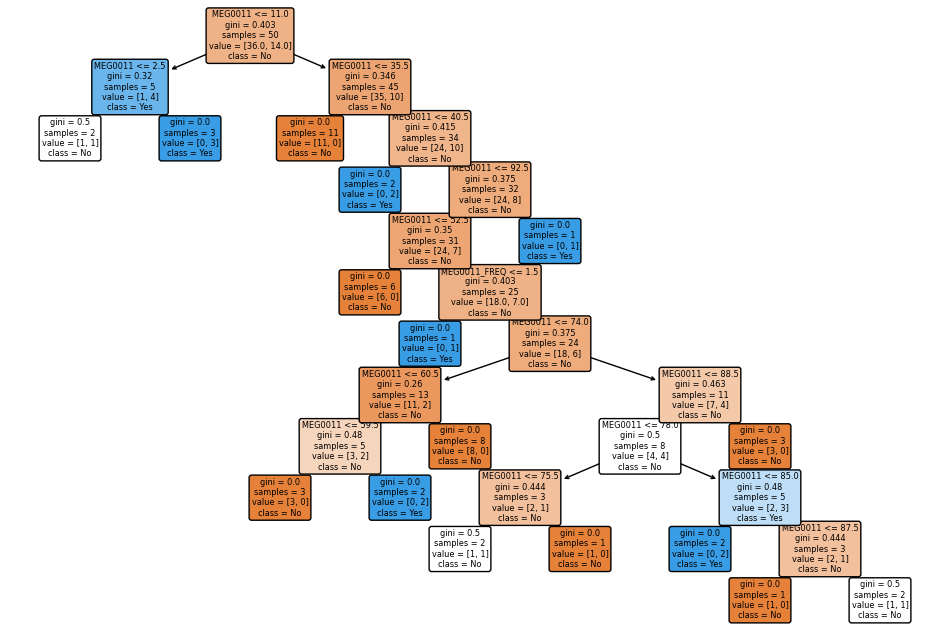

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_],
               filled=True, rounded=True)
plt.show()


C:\Users\Manasa Gayathri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


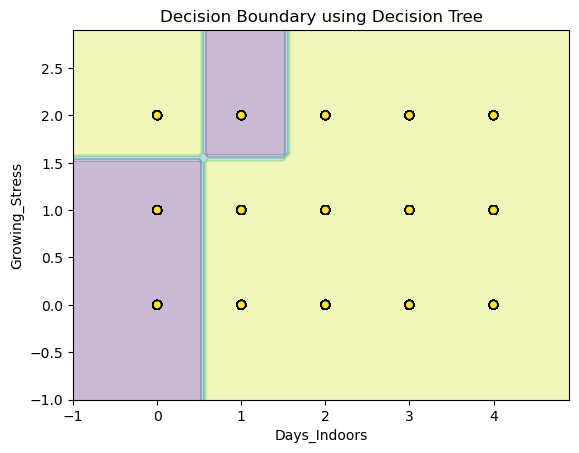

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("Mental Health Dataset.csv")  # replace with your file name

# Encode categorical columns into numeric
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

# Choose 2 features and target
X = data[['Days_Indoors', 'Growing_Stress']]   # you can swap with other features
y = data['treatment']

# Drop NaNs
X = X.dropna()
y = y[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Decision Boundary using Decision Tree")
plt.show()
